In [146]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


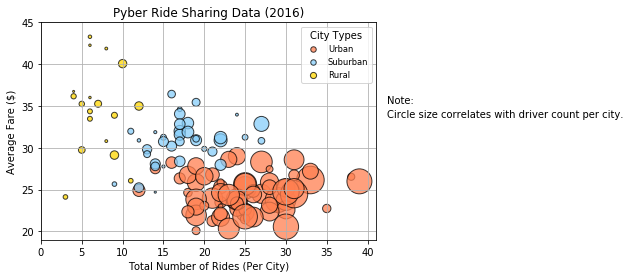

In [161]:
# Obtain the x and y coordinates for each of the three city types
city_ride_data_urban = city_ride_data.loc[city_ride_data["type"] == "Urban"].groupby(["city"])
urban_x = city_ride_data_urban["city"].value_counts()
urban_y = city_ride_data_urban["fare"].mean()
urban_size = city_ride_data_urban["driver_count"].sum()

city_ride_data_suburban = city_ride_data.loc[city_ride_data["type"] == "Suburban"].groupby(["city"])
suburban_x = city_ride_data_suburban["city"].value_counts()
suburban_y = city_ride_data_suburban["fare"].mean()
suburban_size = city_ride_data_suburban["driver_count"].sum()

city_ride_data_rural = city_ride_data.loc[city_ride_data["type"] == "Rural"].groupby(["city"])
rural_x = city_ride_data_rural["city"].value_counts()
rural_y = city_ride_data_rural["fare"].mean()
rural_size = city_ride_data_rural["driver_count"].sum()


# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, marker="o", facecolors="coral", edgecolors="black", s=urban_size/3, alpha=0.75)
plt.scatter(suburban_x, suburban_y, marker="o", facecolors="lightskyblue", edgecolors="black", s=suburban_size/3, alpha=0.75)
plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", edgecolors="black", s=rural_size, alpha=0.75)

# Incorporate the other graph properties
plt.xlim(0,41)
plt.ylim(19,45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(["Urban", "Suburban", "Rural"], title="City Types", loc="upper right", fontsize="small")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(0.925, 0.6, "Note:", fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.925, 0.55, "Circle size correlates with driver count per city.", fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig("../Pyber/images/PyberRideSharing.png")

## Bubble Plot of Ride Sharing Data

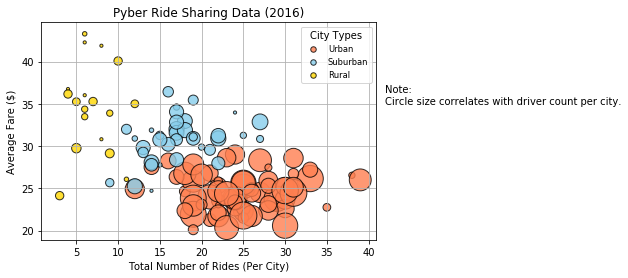

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

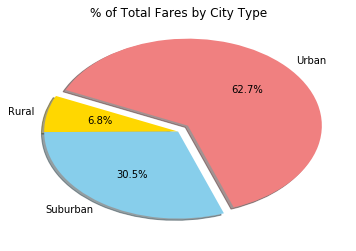

In [148]:
# Calculate Type Percents
urban_fares = city_ride_data.loc[city_ride_data["type"] == "Urban"]["fare"].sum()
suburban_fares = city_ride_data.loc[city_ride_data["type"] == "Suburban"]["fare"].sum()
rural_fares = city_ride_data.loc[city_ride_data["type"] == "Rural"]["fare"].sum()

# Build Pie Chart
types = ["Urban", "Rural", "Suburban"]
fares = [urban_fares, rural_fares, suburban_fares]
colors = ["lightcoral", "gold", "skyblue"]
explode = (0.1, 0, 0)
plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=290)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Pyber/images/PyberTotalFares.png")

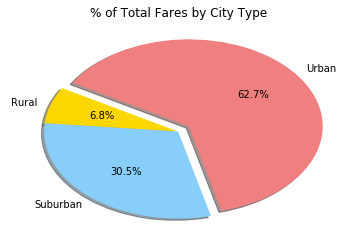

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

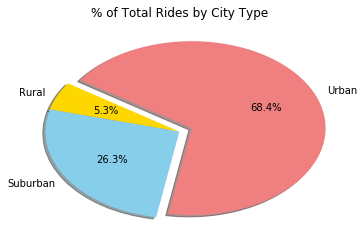

In [149]:
# Calculate Ride Percents
urban_rides = len(city_ride_data.loc[city_ride_data["type"] == "Urban"])
suburban_rides = len(city_ride_data.loc[city_ride_data["type"] == "Suburban"])
rural_rides = len(city_ride_data.loc[city_ride_data["type"] == "Rural"])

# Build Pie Chart
types = ["Urban", "Rural", "Suburban"]
rides = [urban_rides, rural_rides, suburban_rides]
colors = ["lightcoral", "gold", "skyblue"]
explode = (0.1, 0, 0)
plt.pie(rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Pyber/images/PyberTotalRides.png")

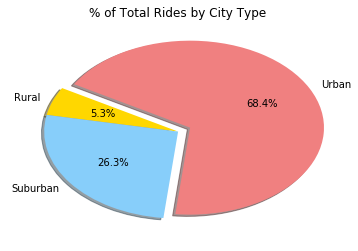

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

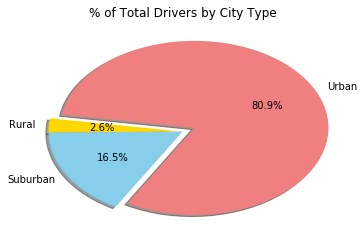

In [157]:
# Calculate Driver Percents
urban_drivers =city_data.loc[city_data["type"] == "Urban"]["driver_count"].sum()
suburban_drivers = city_data.loc[city_data["type"] == "Suburban"]["driver_count"].sum()
rural_drivers = city_data.loc[city_data["type"] == "Rural"]["driver_count"].sum()

# Build Pie Charts
types = ["Urban", "Rural", "Suburban"]
fares = [urban_drivers, rural_drivers, suburban_drivers]
colors = ["lightcoral", "gold", "skyblue"]
explode = (0.1, 0, 0)
plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Pyber/images/PyberTotalDrivers.png")

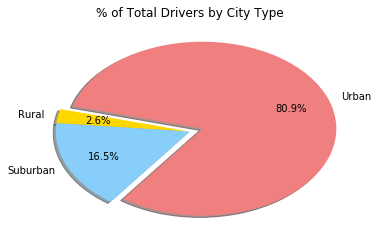

In [6]:
# Show Figure
plt.show()